In [1]:

!pip install keras
!pip install keras-applications

import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications import resnet
import numpy as np
import cv2
from keras import preprocessing
from keras_preprocessing.image import load_img, img_to_array
import os 
import pandas as pd
import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 420.0 kB/s eta 0:00:00


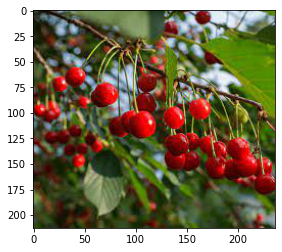

(237, 213)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  del sys.path[0]


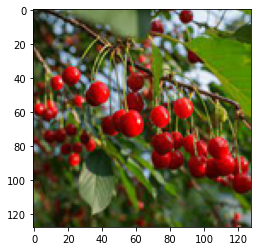

In [2]:
#lire une image comme exemple

import tensorflow as tf
from PIL import Image



image = tf.keras.utils.load_img("/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Cherry/image15.jpeg")
plt.imshow(image)
plt.show()
print(image.size)

im_resized = image.resize((128, 128), Image.ANTIALIAS)

image = img_to_array(im_resized)

plt.imshow(image/255)
plt.show()



In [3]:
path ='/kaggle/input/agricultural-crops-image-classification/Agricultural-crops'



key_value= dict()

for i in os.listdir(path):
    key_value[i] = os.listdir(path+'/'+i)

print(key_value.keys())


dict_keys(['tomato', 'chilli', 'clove', 'pineapple', 'vigna-radiati(Mung)', 'Olive-tree', 'coconut', 'papaya', 'Tobacco-plant', 'jute', 'jowar', 'gram', 'tea', 'maize', 'wheat', 'soyabean', 'Pearl_millet(bajra)', 'Lemon', 'Fox_nut(Makhana)', 'mustard-oil', 'sugarcane', 'almond', 'Cucumber', 'sunflower', 'cotton', 'banana', 'Cherry', 'cardamom', 'rice', 'Coffee-plant'])


In [4]:
df=[]

for key in key_value.keys():
    for j in key_value[key]:
        df.append([key,path+"/"+key+"/"+j])

df1=pd.DataFrame(df ,columns=["label","path"])



In [5]:
from keras_preprocessing.image import load_img, img_to_array
import os 

# Define the path to the directory containing the images
image_dir = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops'

# Create an empty list to store the data and labels
data = []
labels = []

for elem in df1.values :
    image = load_img(elem[1])
  
    image = image.resize((128, 128), Image.ANTIALIAS)

    # convert the image to a numpy array
    image = img_to_array(image)

    #noramlize by dividing by 255
    image/=255
    # Add the image to the data list
    data.append(image)
    # Get the label from the subdirectory name
    label = elem[0]
    # Add the label to the labels list
    labels.append(label)

    

# Use the os.walk method to recursively read images from the directory and its subdirectories
'''
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith('.jpg'):
            # Get the full path of the image
            path = os.path.join(root, file)
            # Read the image using the Keras function
            image = load_img(path)
  
            image = image.resize((128, 128), Image.ANTIALIAS)
            
            # convert the image to a numpy array
            image = img_to_array(image)
            
            #noramlize by dividing by 255
            image/=255
            # Add the image to the data list
            data.append(image)
            # Get the label from the subdirectory name
            label = os.path.basename(root)
            # Add the label to the labels list
            labels.append(label)
'''


from sklearn.model_selection import train_test_split

# Convert the data and labels to numpy arrays
data = np.array(data)
#print(labels)
labels = np.array(labels)


# Split the data into train, validation, and test sets
x_train, x_val_test, y_train, y_val_test = train_test_split(data, labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  


(128, 128, 3)


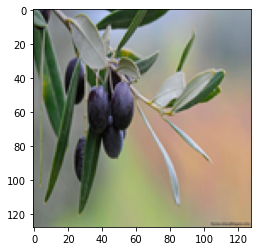

Olive-tree
<class 'numpy.ndarray'>
(array([  0,   6, 124, 159, 192, 206, 208, 236, 276, 310, 322, 341, 346,
       347, 357, 425, 459, 471, 480, 552]),)


In [6]:
print(x_train[0].shape)
plt.imshow(x_train[0])
plt.show()
print(y_train[0])
print(type(y_test))

itemindex = np.where(y_train == "Olive-tree")
print(itemindex)

In [7]:
print(len(data))
print(len(labels))
print(type(data))


829
829
<class 'numpy.ndarray'>


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)



np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [9]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                activation='relu',
                input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(1,1)))
model.add(Conv2D(64, kernel_size=(3, 3),
                activation='relu'))


model.add(Flatten())
model.add(Dense(300, activation='relu'))
#model.add(Dense(300, activation='relu'))
#model.add(Dense(300, activation='relu'))

model.add(Dense(30, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 64)      36928     
_________________________________________________________________
flatten (Flatten)            (None, 937024)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               281107500 
_________________________________________________________________
dense_1 (Dense)              (None, 30)                9030      
Total params: 281,155,250
Trainable params: 281,155,250
Non-trainable params: 0
__________________________________________

2023-01-27 00:34:42.144071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 00:34:42.236744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 00:34:42.237804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 00:34:42.240199: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
from tensorflow.keras.optimizers import SGD




#compilation du modèle

model.compile(loss="sparse_categorical_crossentropy" ,optimizer= tf.keras.optimizers.SGD(
    learning_rate=0.002,
    momentum=0.85,
    nesterov=True),metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 64)      36928     
_________________________________________________________________
flatten (Flatten)            (None, 937024)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               281107500 
_________________________________________________________________
dense_1 (Dense)              (None, 30)                9030      
Total params: 281,155,250
Trainable params: 281,155,250
Non-trainable params: 0
__________________________________________

In [11]:
# Fit the model using the generator
model.fit(x_train, y_train, validation_data = (x_val,y_val), epochs=25, batch_size=32)

2023-01-27 00:34:45.327186: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2023-01-27 00:34:46.643673: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


19/19 [==============================] - 9s 92ms/step - loss: 3.4204 - accuracy: 0.0397 - val_loss: 3.3792 - val_accuracy: 0.0484
Epoch 2/25
19/19 [==============================] - 1s 68ms/step - loss: 3.2605 - accuracy: 0.1034 - val_loss: 3.3590 - val_accuracy: 0.0484
Epoch 3/25
19/19 [==============================] - 1s 67ms/step - loss: 3.1149 - accuracy: 0.1414 - val_loss: 3.2355 - val_accuracy: 0.0484
Epoch 4/25
19/19 [==============================] - 1s 66ms/step - loss: 2.8758 - accuracy: 0.2000 - val_loss: 3.4184 - val_accuracy: 0.0242
Epoch 5/25
19/19 [==============================] - 1s 64ms/step - loss: 2.6413 - accuracy: 0.2707 - val_loss: 3.9223 - val_accuracy: 0.0887
Epoch 6/25
19/19 [==============================] - 1s 63ms/step - loss: 2.3786 - accuracy: 0.3828 - val_loss: 3.5645 - val_accuracy: 0.1452
Epoch 7/25
19/19 [==============================] - 1s 63ms/step - loss: 2.0508 - accuracy: 0.4603 - val_loss: 3.4795 - val_accuracy: 0.0645
Epoch 8/25
19/19 [======

In [12]:
ynew = model.predict(x_test)
ynew.shape

(125, 30)

In [13]:
print(model.evaluate(x_test,y_test))

print(type(model.evaluate(x_test,y_test)))

4/4 [==============================] - 0s 16ms/step - loss: 5.4745 - accuracy: 0.2480
[5.47453498840332, 0.24799999594688416]
4/4 [==============================] - 0s 16ms/step - loss: 5.4745 - accuracy: 0.2480
<class 'list'>


In [14]:
#from keras_applications.resnet import ResNet50

from keras.applications.resnet import ResNet50

## implementing trensfer learning
base_model = ResNet50(weights='imagenet', include_top=False)

# freezing the base model so we donot have to train it again
base_model.trainable = False


model2 = keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1024, activation='relu'),
  keras.layers.Dense(30, activation='softmax')
])
model2.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

94781440/94765736 [==============================] - 3s 0us/step


In [15]:
model2.fit(x_train,y_train, epochs=120, batch_size=32,validation_data=(x_val,y_val))

Epoch 1/120
19/19 [==============================] - 5s 109ms/step - loss: 3.5361 - accuracy: 0.0328 - val_loss: 3.4950 - val_accuracy: 0.0323
Epoch 2/120
19/19 [==============================] - 1s 36ms/step - loss: 3.4145 - accuracy: 0.0534 - val_loss: 3.4133 - val_accuracy: 0.0565
Epoch 3/120
19/19 [==============================] - 1s 35ms/step - loss: 3.3567 - accuracy: 0.0672 - val_loss: 3.3985 - val_accuracy: 0.0484
Epoch 4/120
19/19 [==============================] - 1s 38ms/step - loss: 3.3046 - accuracy: 0.0724 - val_loss: 3.3506 - val_accuracy: 0.0645
Epoch 5/120
19/19 [==============================] - 1s 35ms/step - loss: 3.2597 - accuracy: 0.0707 - val_loss: 3.3166 - val_accuracy: 0.0645
Epoch 6/120
19/19 [==============================] - 1s 35ms/step - loss: 3.2456 - accuracy: 0.0707 - val_loss: 3.2950 - val_accuracy: 0.0645
Epoch 7/120
19/19 [==============================] - 1s 38ms/step - loss: 3.2279 - accuracy: 0.0845 - val_loss: 3.3149 - val_accuracy: 0.0403
Epoch

In [16]:
print(model2.evaluate(x_test,y_test))

print(type(model2.evaluate(x_test,y_test)))

4/4 [==============================] - 0s 74ms/step - loss: 3.2375 - accuracy: 0.2080
[3.2374584674835205, 0.20800000429153442]
4/4 [==============================] - 0s 28ms/step - loss: 3.2375 - accuracy: 0.2080
<class 'list'>
